# Animal Dataset Analysis

Analysis of the animal image dataset organized in folders where each folder name represents an animal class.



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from pathlib import Path

random.seed(42)


Found 10 animal classes: dog, horse, butterfly, cow, squirrel, sheep, cat, elephant, cock, spider


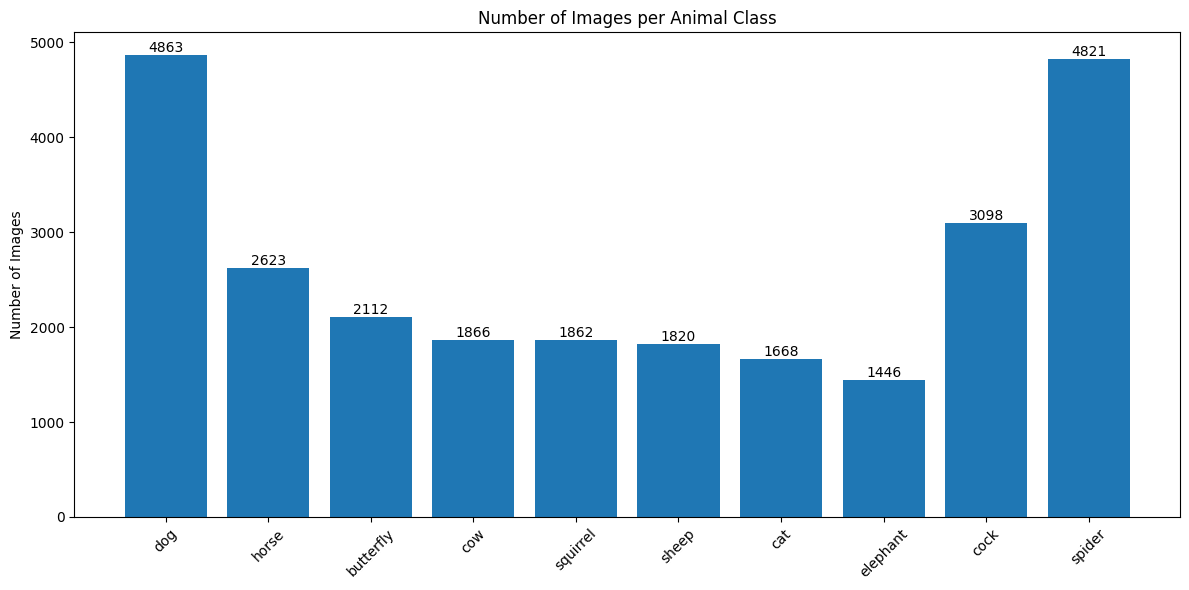

In [2]:
DATA_DIR = 'data'

# Get all animal classes
animal_classes = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"Found {len(animal_classes)} animal classes: {', '.join(animal_classes)}")

# Count images per class
class_sizes = {}
for animal in animal_classes:
    class_path = os.path.join(DATA_DIR, animal)
    class_sizes[animal] = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Plot class distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(class_sizes.keys(), class_sizes.values())
plt.title('Number of Images per Animal Class')
plt.xticks(rotation=45)
plt.ylabel('Number of Images')


# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 2. Image Analysis

Dataset Statistics:
Total images analyzed: 26179

Image modes distribution:
mode
RGB     26128
RGBA       49
CMYK        1
L           1
Name: count, dtype: int64


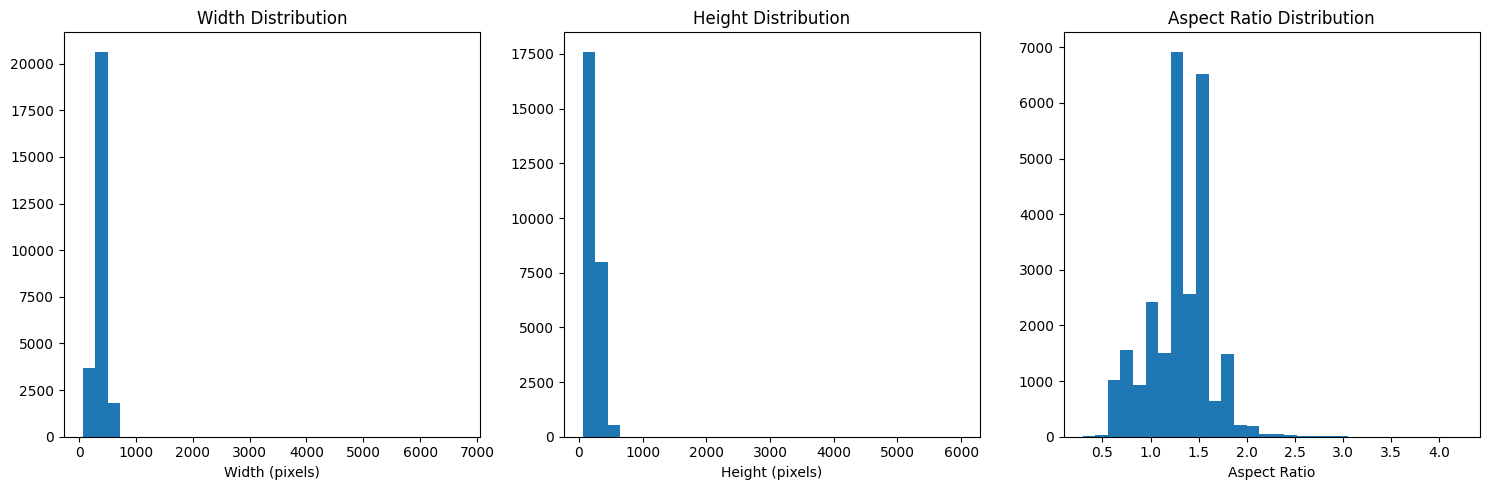

In [ ]:
def analyze_images(data_dir, sample_size=26179):
    image_data = []
    
    for animal in animal_classes:
        class_path = os.path.join(data_dir, animal)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Sample images from the class
        sampled_images = random.sample(images, min(sample_size, len(images)))
        
        for img_name in sampled_images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    mode = img.mode
                    # Convert image to numpy array for quick statistics
                    img_array = np.array(img)
                    if len(img_array.shape) == 3:
                        brightness = img_array.mean()
                    else:
                        brightness = img_array.mean()
                    
                    image_data.append({
                        'class': animal,
                        'width': width,
                        'height': height,
                        'aspect_ratio': width/height,
                        'mode': mode,
                        'brightness': brightness,
                        'file_size': os.path.getsize(img_path) / 1024  
                    })
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                
    return pd.DataFrame(image_data)

df_images = analyze_images(DATA_DIR)

# Display basic statistics
print("Dataset Statistics:")
print(f"Total images analyzed: {len(df_images)}")
print("\nImage modes distribution:")
print(df_images['mode'].value_counts())

# Plot image sizes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_images['width'], bins=30)
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')

plt.subplot(1, 3, 2)
plt.hist(df_images['height'], bins=30)
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')

plt.subplot(1, 3, 3)
plt.hist(df_images['aspect_ratio'], bins=30)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')

plt.tight_layout()
plt.show()

## 3. Sample Images Visualization

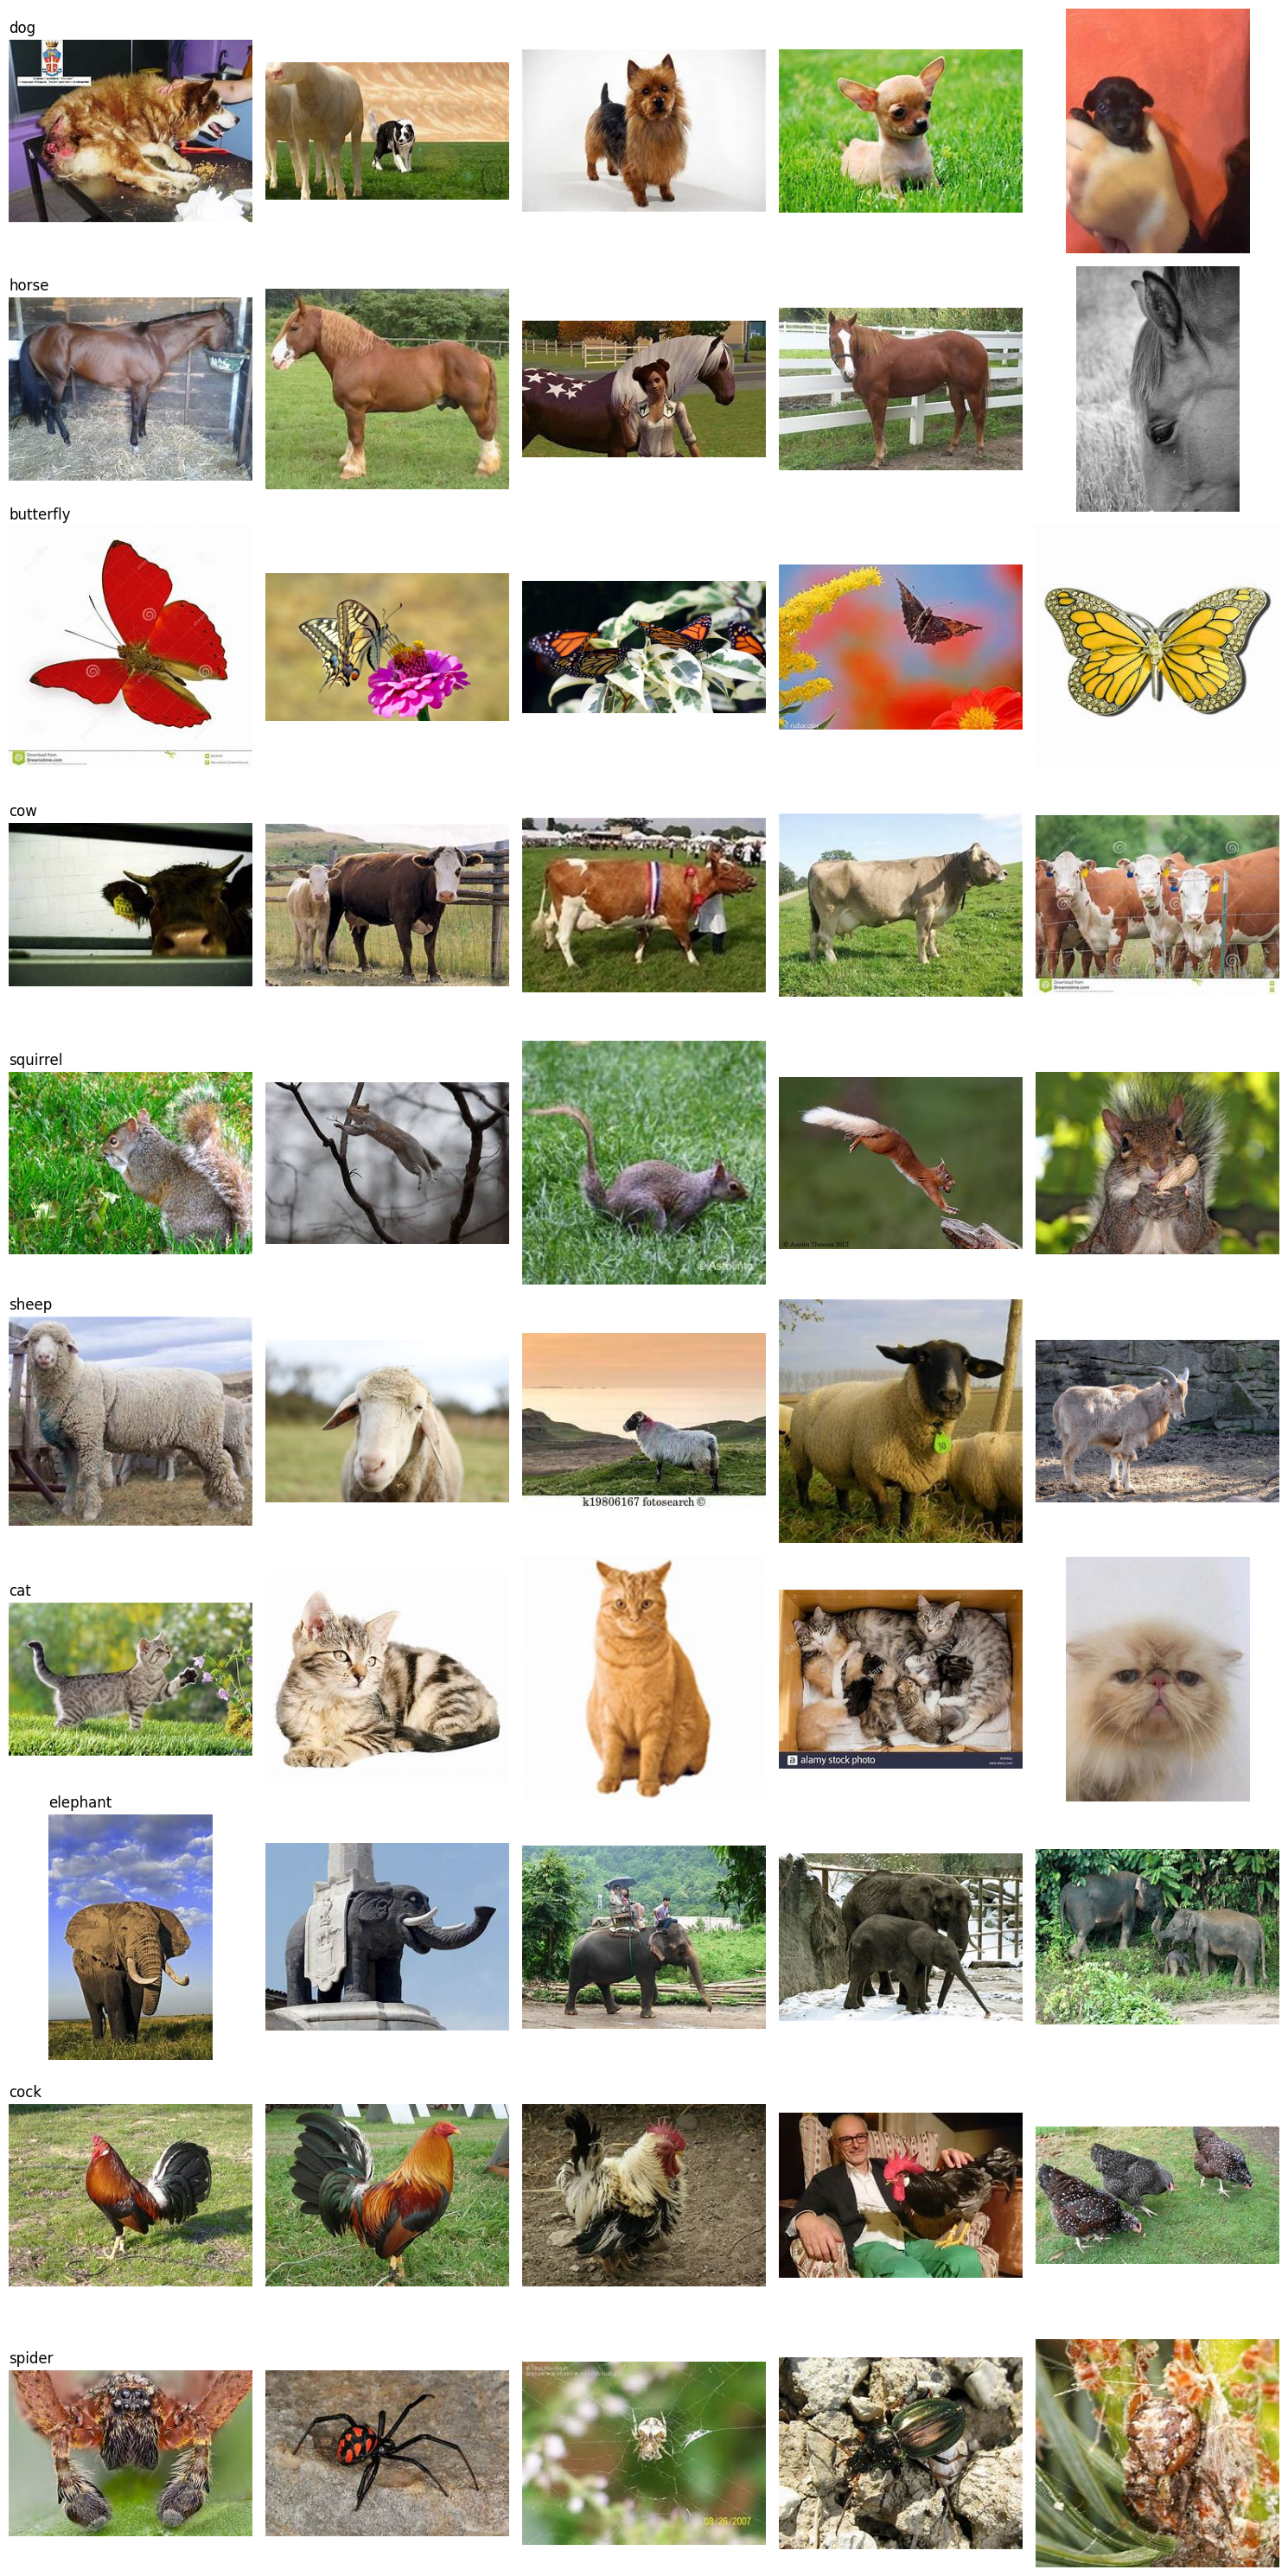

In [ ]:
def plot_sample_images(data_dir, samples_per_class=5):
    n_classes = len(animal_classes)
    fig, axes = plt.subplots(n_classes, samples_per_class, figsize=(15, 3*n_classes))
    
    for i, animal in enumerate(animal_classes):
        class_path = os.path.join(data_dir, animal)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        samples = random.sample(images, samples_per_class)
        
        for j, img_name in enumerate(samples):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:  
                axes[i, j].set_title(animal, loc='left')
    
    plt.tight_layout()
    plt.show()

plot_sample_images(DATA_DIR)

## 4. Image Quality Analysis

/tmp/ipykernel_6522/257675122.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_6522/257675122.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
/tmp/ipykernel_6522/257675122.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_6522/257675122.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


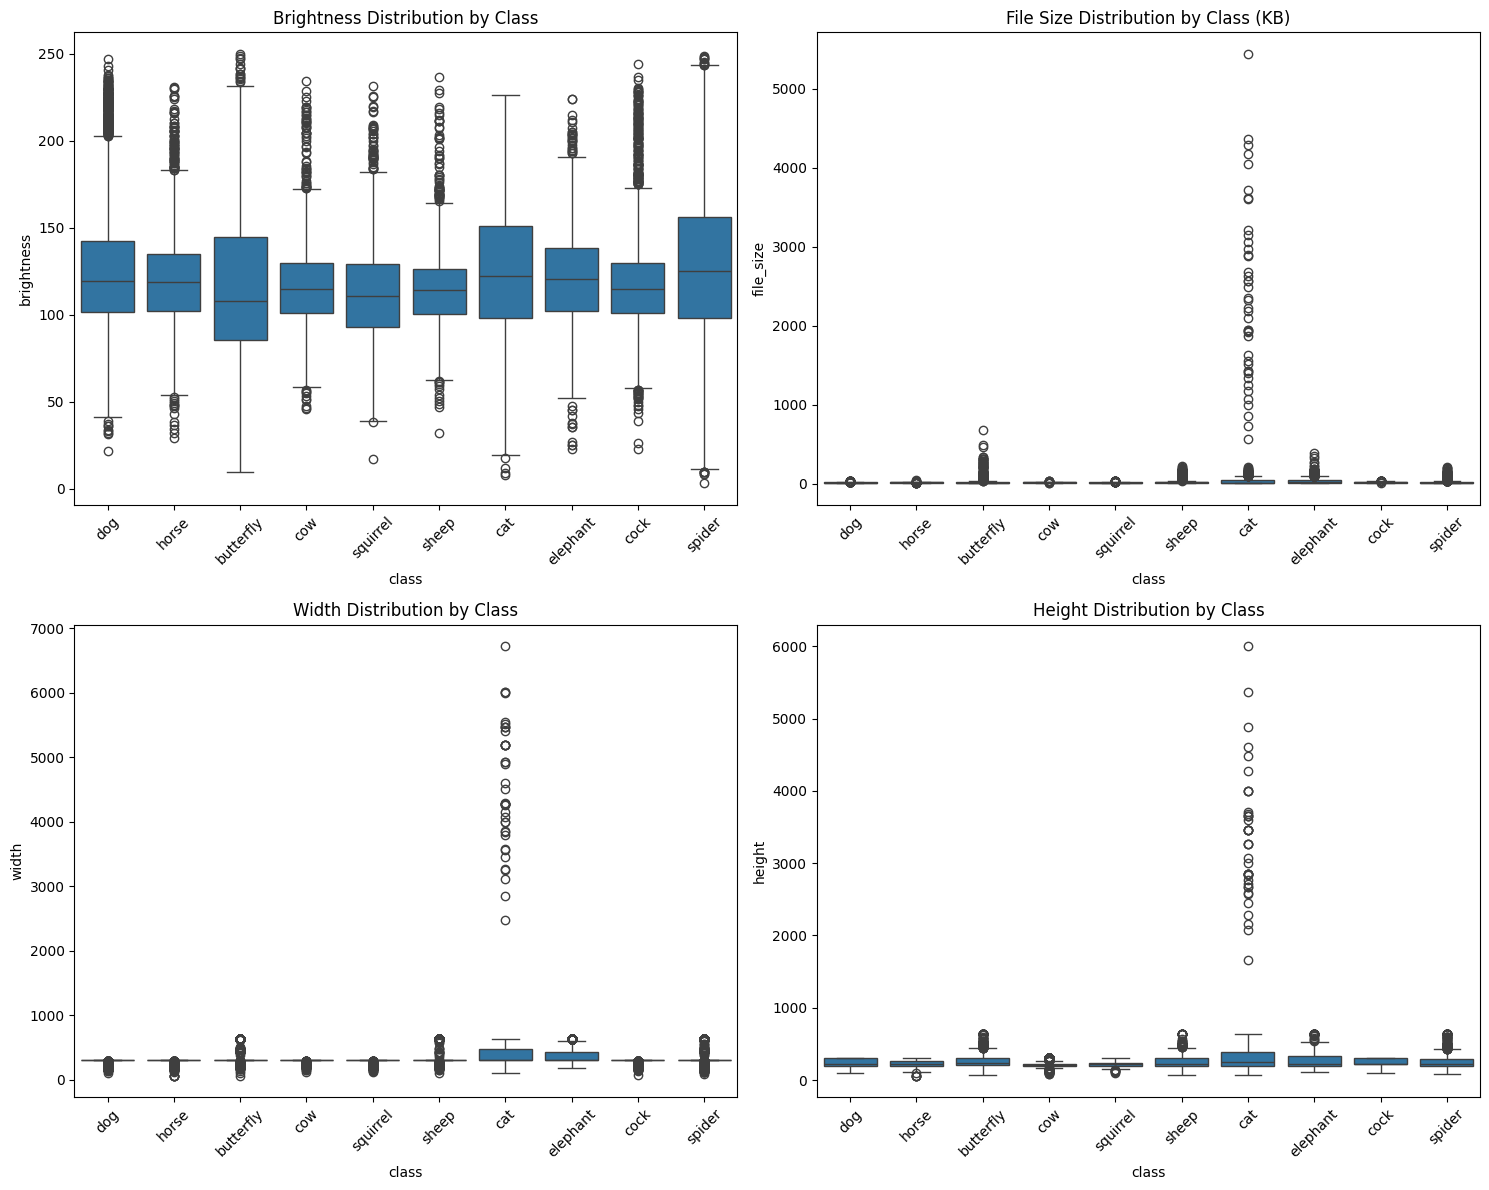

In [5]:
# Plot quality metrics by class
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=df_images, x='class', y='brightness', ax=axes[0, 0])
axes[0, 0].set_title('Brightness Distribution by Class')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

sns.boxplot(data=df_images, x='class', y='file_size', ax=axes[0, 1])
axes[0, 1].set_title('File Size Distribution by Class (KB)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

sns.boxplot(data=df_images, x='class', y='width', ax=axes[1, 0])
axes[1, 0].set_title('Width Distribution by Class')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

sns.boxplot(data=df_images, x='class', y='height', ax=axes[1, 1])
axes[1, 1].set_title('Height Distribution by Class')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 5. Dataset Analysis Summary

### Class Distribution:
- Total number of classes: 10
- Total number of images: 26179
- Average images per class: 2617.9
- Most common class: dog (4863 images)
- Least common class: elephant (1446 images)

### Image Properties:
- Average width: 326.3 pixels
- Average height: 262.0 pixels
- Average file size: 24.2 KB
- Most common image mode: RGB
